In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
np.set_printoptions(suppress=True)

a1 = np.array([ 0.000000000,2.248293508, 2.248293508])
a2 = np.array([ 2.248293508,0 ,2.248293508])
a3 = np.array([ 2.248293508 ,2.248293508,0.000000000,])
np.linalg.norm(a1+a2+a3)

7.7883171723665283

In [2]:
sc1 = np.linalg.norm(a1+a2+a3)
sc2 = np.linalg.norm(a1+a2)
sc3 = np.linalg.norm(2*a3)
[sc1, sc2, sc3]

[7.7883171723665283, 5.5071718866120092, 6.359134342417966]

In [3]:
al1 = 5.0144837000582232
al2 = 5.4178094990763324
al3 = 6.2559204194986435

In [4]:
sc1/al1

1.5531643212393129

In [5]:
sc1 * al2/sc2 * al3/sc3 + al1

12.552063858881805

In [16]:
np.dot(np.cross([1,1,1],[2,-2,0]),[-1,-1,2])

-12

In [20]:
0.37827 / 2 + 0.25

0.439135

In [21]:
al1/3

1.6714945666860743

In [24]:
0.1 - (0.248365 - 0.189135)

0.04077

In [41]:
sc1 / 12.552063858881805

0.6204810029591697

In [ ]:
POSCAR = []
line0 = PoscarIn[0].split()
size = (3, 2, 1)
line0.append('Supercell %dx%dx%d' % size)
POSCAR.append(' '.join(line0))
POSCAR.append(PoscarIn[1])
scalevecs = [[vecs[i][j]*size[i] for j in range(3)] for i in range(3)]
for i in range(3):
    POSCAR.append(' '.join(map(str,scalevecs[i])))
POSCAR.append(PoscarIn[5])
totatoms = [atoms[i] * size[i]*size[i-1]*size[i-2] for i in range(2)]
POSCAR.append(' '.join(map(str,totatoms)))
POSCAR.append('Direct')
for a in range(8,8+sum(atoms)):
    for x in range(size[0]):
        for y in range(size[1]):
            for z in range(size[2]):
                dim = [x,y,z]
                pos = map(float,PoscarIn[a].split()[0:3])
                POSCAR.append(' '.join(map(str,[(pos[i]+dim[i])/size[i] for i in range(3)])))
loc = '/home/nadamski/remote/cscratch/GaN/mat279/3x2x100'
POS = loc + "/POSCAR332"
!rm "{POS##*/}" 
for line in POSCAR:
    !echo $line >> "{POS##*/}" 

In [55]:
PoscarIn = !cat /home/nadamski/ScN_AlN/oute.vasp
positions = np.array([map(float, PoscarIn[i].split()[0:3]) for i in range(8,8+24)])

In [174]:
positions

array([[0.      , 0.25    , 0.5     ],
       [0.333333, 0.25    , 0.833333],
       [0.      , 0.      , 0.      ],
       [0.333333, 0.      , 0.333333],
       [0.666667, 0.      , 0.666667],
       [0.      , 0.75    , 0.5     ],
       [0.333333, 0.75    , 0.833333],
       [0.      , 0.5     , 0.      ],
       [0.333333, 0.5     , 0.333333],
       [0.666667, 0.5     , 0.666667],
       [0.666667, 0.25    , 0.166667],
       [0.666667, 0.75    , 0.166667],
       [0.5     , 0.25    , 0.5     ],
       [0.833333, 0.25    , 0.833333],
       [0.5     , 0.      , 0.      ],
       [0.833333, 0.      , 0.333333],
       [0.166667, 0.      , 0.666667],
       [0.5     , 0.75    , 0.5     ],
       [0.833333, 0.75    , 0.833333],
       [0.5     , 0.5     , 0.      ],
       [0.833333, 0.5     , 0.333333],
       [0.166667, 0.5     , 0.666667],
       [0.166667, 0.25    , 0.166667],
       [0.166667, 0.75    , 0.166667]])

In [185]:
positions = positions.T[[0,2,1]].T

In [186]:
positions * np.array([0.6204810029591697, 1, 1]) + np.array([1-0.6204810029591697,0,0])


array([[0.379519  , 0.5       , 0.25      ],
       [0.58634579, 0.833333  , 0.25      ],
       [0.379519  , 0.        , 0.        ],
       [0.58634579, 0.333333  , 0.        ],
       [0.79317321, 0.666667  , 0.        ],
       [0.379519  , 0.5       , 0.75      ],
       [0.58634579, 0.833333  , 0.75      ],
       [0.379519  , 0.        , 0.5       ],
       [0.58634579, 0.333333  , 0.5       ],
       [0.79317321, 0.666667  , 0.5       ],
       [0.79317321, 0.166667  , 0.25      ],
       [0.79317321, 0.166667  , 0.75      ],
       [0.6897595 , 0.5       , 0.25      ],
       [0.89658629, 0.833333  , 0.25      ],
       [0.6897595 , 0.        , 0.        ],
       [0.89658629, 0.333333  , 0.        ],
       [0.4829327 , 0.666667  , 0.        ],
       [0.6897595 , 0.5       , 0.75      ],
       [0.89658629, 0.833333  , 0.75      ],
       [0.6897595 , 0.        , 0.5       ],
       [0.89658629, 0.333333  , 0.5       ],
       [0.4829327 , 0.666667  , 0.5       ],
       [0.

In [187]:
PoscarAl = !cat /home/nadamski/ScN_AlN/AlN.vasp
positionsAl = np.array([map(float, PoscarAl[i].split()[0:3]) for i in range(8,8+16)])
positionsAl

array([[ 0.49672999,  0.33333402,  0.        ],
       [-0.00327001,  0.66666598,  0.        ],
       [-0.00327001,  0.16666598,  0.25      ],
       [ 0.49672999,  0.83333402,  0.25      ],
       [ 0.49672999,  0.83333402,  0.75      ],
       [-0.00327001,  0.16666598,  0.75      ],
       [-0.00327001,  0.66666598,  0.5       ],
       [ 0.49672999,  0.33333402,  0.5       ],
       [ 0.37827001,  0.66666404, -0.        ],
       [ 0.87827001,  0.33333595, -0.        ],
       [ 0.87827001,  0.83333596,  0.25      ],
       [ 0.37827001,  0.16666404,  0.25      ],
       [ 0.37827001,  0.66666404,  0.5       ],
       [ 0.87827001,  0.33333595,  0.5       ],
       [ 0.87827001,  0.83333596,  0.75      ],
       [ 0.37827001,  0.16666404,  0.75      ]])

In [188]:
positionsAl -= [positionsAl[0][0],0,0]
for i in range(len(positionsAl)):
    if positionsAl[i][0] < -0.01:
        positionsAl[i] += [1,0,0]
positionsAl  -= np.array([0, 0.33333402,0])
positionsAl

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01,  3.33331960e-01,  0.00000000e+00],
       [ 5.00000000e-01, -1.66668040e-01,  2.50000000e-01],
       [ 0.00000000e+00,  5.00000000e-01,  2.50000000e-01],
       [ 0.00000000e+00,  5.00000000e-01,  7.50000000e-01],
       [ 5.00000000e-01, -1.66668040e-01,  7.50000000e-01],
       [ 5.00000000e-01,  3.33331960e-01,  5.00000000e-01],
       [ 0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 8.81540015e-01,  3.33330020e-01,  0.00000000e+00],
       [ 3.81540015e-01,  1.93000000e-06, -0.00000000e+00],
       [ 3.81540015e-01,  5.00001940e-01,  2.50000000e-01],
       [ 8.81540015e-01, -1.66669980e-01,  2.50000000e-01],
       [ 8.81540015e-01,  3.33330020e-01,  5.00000000e-01],
       [ 3.81540015e-01,  1.93000000e-06,  5.00000000e-01],
       [ 3.81540015e-01,  5.00001940e-01,  7.50000000e-01],
       [ 8.81540015e-01, -1.66669980e-01,  7.50000000e-01]])

In [192]:
(-1.66668040 / 10.0 + 1)

0.83333196

In [190]:
positionsAl = positionsAl * np.array([1-0.6204810029591697, 1, 1])
for i in positionsAl:
    print("".join(str(i)))

[0. 0. 0.]
[0.1897595  0.33333196 0.        ]
[ 0.1897595  -0.16666804  0.25      ]
[0.   0.5  0.25]
[0.   0.5  0.75]
[ 0.1897595  -0.16666804  0.75      ]
[0.1897595  0.33333196 0.5       ]
[0.  0.  0.5]
[0.33456118 0.33333002 0.        ]
[ 1.44801684e-01  1.93000000e-06 -0.00000000e+00]
[0.14480168 0.50000194 0.25      ]
[ 0.33456118 -0.16666998  0.25      ]
[0.33456118 0.33333002 0.5       ]
[1.44801684e-01 1.93000000e-06 5.00000000e-01]
[0.14480168 0.50000194 0.75      ]
[ 0.33456118 -0.16666998  0.75      ]


In [96]:
list(i)[0]

0.8815400145284054

In [95]:
i[0]

0.8815400145284054

In [4]:
PoscarIn = !cat /home/nadamski/POSCAR
positions = np.array([map(float, PoscarIn[i].split()[0:3]) for i in range(8,24)])
positions = positions.T[[1,2,0]].T
positions = [map(str,positions[i]) for i in range(len(positions))]
for i in positions: 
    print ' '.join(i)

0.5840820633045081 0.8754472310631414 0.9990005655313112
0.9159179366954919 0.3754472310631414 0.4990005655313112
0.4159179366954919 0.1245527689368586 0.4990005655313112
0.0840820633045081 0.6245527689368586 0.9990005655313112
0.0765335183255685 0.1255851187323762 9.9399286299e-05
0.9234664816744315 0.8744148812676238 0.500099399286299
0.4234664816744315 0.6255851187323762 0.500099399286299
0.5765335183255685 0.3744148812676238 9.9399286299e-05
0.5980894067007526 0.8595550458648584 0.392876488169528
0.4019105932992474 0.1404449541351415 0.8928764881695279
0.9019105932992474 0.3595550458648585 0.8928764881695279
0.0980894067007526 0.6404449541351416 0.392876488169528
0.5657267807201696 0.3900599686325099 0.3590235470128737
0.0657267807201696 0.1099400313674901 0.3590235470128737
0.9342732192798304 0.8900599686325099 0.8590235470128736
0.4342732192798304 0.6099400313674901 0.8590235470128736


In [6]:
positions[1]

['0.333335746665624', '-0.0', '0.1735531878444957']

In [36]:
PoscarIn = !cat /home/nadamski/test/CONTCAR
positions = np.array([map(float, PoscarIn[i].split()[0:3]) for i in range(8,24)])
positions = positions.T[[1,2,0]].T
#print positions
positions = [map(str,positions[i]) for i in range(len(positions))]
for i in positions: 
    print ' '.join(i)

0.3320556866549791 -0.0 0.4947064874978223
0.6679443133450207 -0.0 0.9947064874978221
0.1641894446044205 0.2372179841626551 0.995549450904465
0.8358105553955792 0.2372179841626551 0.4955494509044652
0.8358105553955792 0.7627820158373447 0.4955494509044652
0.1641894446044205 0.7627820158373447 0.995549450904465
0.6781605387038414 0.5 0.9808366498405251
0.3218394612961587 0.5 0.4808366498405251
0.6587252185310332 -0.0 0.3763682813116686
0.3412747814689667 -0.0 0.8763682813116688
0.8439989946990597 0.2283163836576788 0.8735835344523115
0.1560010053009406 0.2283163836576788 0.3735835344523118
0.6936046263026513 0.5 0.4098226106364304
0.3063953736973485 0.5 0.9098226106364304
0.8439989946990597 0.7716836163423213 0.8735835344523115
0.1560010053009406 0.7716836163423213 0.3735835344523118


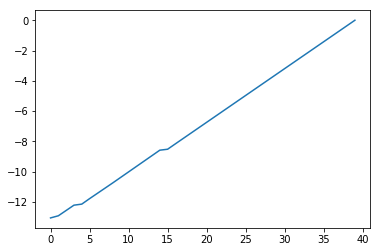

-1.1388172742311775

In [76]:
a = 5.0249174294300785 * 8
b = 5.0249174294300785 *6
V = 5.0249174294300785 * 5.5886636152816154 * 6.5312340734480951
ypol = [2.69056 + 24.45410-a, 24.92959+2.3558-a,24.27594 + 3.36014-a, 
        23.6223+ 4.36408-a, -4.94244 + 22.94797-b, 22.30673 -3.93968-b,
        21.65308-2.93617-b, 20.99944 -1.9325-b, 20.34579-0.92855-b, 
        16.39495+ 5.17283-b, 15.74130 - 4.16015-a/2, 15.08766-3.14942-a/2, 0]
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 16, 39],ypol)
plt.show()

(2.69056 + 24.45410-a) / V * 1.6e-19 * 1e20

In [72]:
x  = np.arange(0, 1, 0.01)
P = -0.089*(1-x) - 0.874*x + 0.741*(1-x)*x

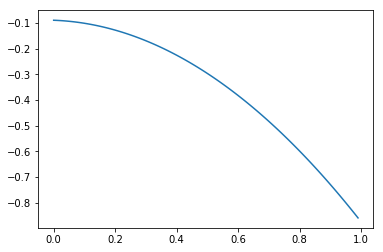

In [73]:
plt.plot(x,P)